In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import textblob
from textblob import TextBlob
import textblob.exceptions

import warnings
warnings.filterwarnings('ignore')

In [2]:
def textblob_idToEn_score(text):
  try:
    blob_obj = TextBlob(text=text)
    text_en = blob_obj.translate(from_lang='id', to='en')
  except textblob.exceptions.NotTranslated:
    print(f'{text} is not translated')
    text_en=TextBlob(text=text)

  score = text_en.sentiment.polarity
  return score

In [10]:
# Detik URL format https://www.detik.com/tag/{keyword_url}/?page={page_num}

def scrape_detik_news(keyword='pilpres 2024'):
  keyword_url = keyword.replace(' ', '-')
  news = []

  page_num = 1

  while True:
    page_url = f'https://www.detik.com/tag/{keyword_url}/?page={page_num}'
    print(f'Scraping Detik Page {page_num}')

    page = requests.get(page_url)
    soup = BeautifulSoup(page.content, "html.parser")
    # print(soup)

    articles = soup.find_all('article')

    for i in articles:
      url = i.find('a').get('href')
      title = i.find('h2', 'title').text

      polarity = textblob_idToEn_score(title)

      news.append({
        'keyword' : keyword,
        'platform' : 'detik.com',
        'url' : url,
        'title' : title,
        'score' : polarity
      })

      # if not bool(i.find('h2', 'title')):
      #   break

    if page_num > 30:
      break

    page_num+=1
  return news


In [9]:
# Kompas url format https://www.kompas.com/tag/anies+baswedan?page=2

def scrape_kompas_news(keyword='pilpres 2024'):
  keyword_url = keyword.replace(' ', '+')
  news = []

  page_num = 1

  while True:
    page_url = f' https://www.kompas.com/tag/{keyword_url}/?page={page_num}'
    print(f'Scraping Page Kompas {page_num}')

    page = requests.get(page_url)
    soup = BeautifulSoup(page.content, "html.parser")
    # print(soup)

    articles = soup.find_all('div', class_='article__list clearfix')

    for i in articles:
      url = i.find('a').get('href')
      title = i.find('a').text

      polarity = textblob_idToEn_score(title)

      news.append({
        'keyword' : keyword,
        'platform' : 'kompas.com',
        'url' : url,
        'title' : title,
        'score' : polarity
      })

      # if not bool(i.find('h2', 'title')):
      #   break

    if page_num > 30:
      break

    page_num+=1
  return news


In [8]:
# Liputan6 url format https://www.liputan6.com/tag/anies-baswedan?page=2

def scrape_liputan6_news(keyword='pilpres 2024'):
  keyword_url = keyword.replace(' ', '-')
  news = []

  page_num = 1

  while True:
    page_url = f'https://www.liputan6.com/tag/{keyword_url}/?page={page_num}'
    print(f'Scraping Page Liputan6 {page_num}')

    page = requests.get(page_url)
    soup = BeautifulSoup(page.content, "html.parser")
    # print(soup)

    articles = soup.find_all('article')

    for i in articles:
      h4_element = i.find('h4')

      if h4_element:
        a_element = h4_element.find('a')

        if a_element:
          url = a_element.get('href', '')
          title = a_element.get_text(strip=True)

          polarity = textblob_idToEn_score(title)

          news.append({
            'keyword': keyword,
            'platform': 'liputan6.com',
            'url': url,
            'title': title,
            'score': polarity
          })


      # if not bool(i.find('h2', 'title')):
      #   break

    if page_num > 30:
      break

    page_num+=1
  return news

In [57]:
# # Tribun URL Format https://jabar.tribunnews.com/tag/anies-baswedan?page=2

# def scrape_tribun_news(keyword='pilpres 2024'):
#   keyword_url = keyword.replace(' ', '-')
#   news = []

#   page_num = 1

#   while True:
#     page_url = f'https://jabar.tribunnews.com/tag/{keyword_url}/?page={page_num}'
#     print(f'Scraping Page Tribun {page_num}')

#     page = requests.get(page_url)
#     soup = BeautifulSoup(page.content, "html.parser")
#     # print(soup)

#     i_element = soup.find_all('li', class_='ptb15')

#     for i in i_element:
#       if i_element:
#         a_element = i_element.find('a')

#         if a_element:
#           url = a_element.get('href')
#           title = a_element.get('title')

#           polarity = textblob_idToEn_score(title)

#           news.append({
#             'keyword': keyword,
#             'platform': 'jabar.tribunnews.com',
#             'url': url,
#             'title': title,
#             'score': polarity
#           })


#       # if not bool(i.find('h2', 'title')):
#       #   break

#     if page_num > 1:
#       break

#     page_num+=1
#   return news

In [13]:
anies_detik=scrape_detik_news('anies baswedan')

Scraping Detik Page 1
Scraping Detik Page 2
Scraping Detik Page 3
Scraping Detik Page 4
Scraping Detik Page 5
Scraping Detik Page 6
Scraping Detik Page 7
Scraping Detik Page 8
Scraping Detik Page 9
Scraping Detik Page 10
Scraping Detik Page 11
Scraping Detik Page 12
Scraping Detik Page 13
Scraping Detik Page 14
Anies Bubble, Prabowo Gemoy, Ganjar Merakyat is not translated
Scraping Detik Page 15
Scraping Detik Page 16
Scraping Detik Page 17
Scraping Detik Page 18
Scraping Detik Page 19
Scraping Detik Page 20
Scraping Detik Page 21
Scraping Detik Page 22
Scraping Detik Page 23
Scraping Detik Page 24
Scraping Detik Page 25
Scraping Detik Page 26
Scraping Detik Page 27
Scraping Detik Page 28
Scraping Detik Page 29
Scraping Detik Page 30
Scraping Detik Page 31


In [15]:
anies_kompas=scrape_kompas_news('anies baswedan')

Scraping Page Kompas 1
Scraping Page Kompas 2
Scraping Page Kompas 3
Scraping Page Kompas 4
Scraping Page Kompas 5
Scraping Page Kompas 6
Scraping Page Kompas 7
Scraping Page Kompas 8
Scraping Page Kompas 9
Scraping Page Kompas 10
Muhaimin: I Love Pak Ganjar is not translated
Scraping Page Kompas 11
Scraping Page Kompas 12
Scraping Page Kompas 13
Scraping Page Kompas 14
Scraping Page Kompas 15
Scraping Page Kompas 16
Scraping Page Kompas 17
Scraping Page Kompas 18
Scraping Page Kompas 19
Scraping Page Kompas 20
Scraping Page Kompas 21
Scraping Page Kompas 22
Scraping Page Kompas 23
Scraping Page Kompas 24
Scraping Page Kompas 25
Scraping Page Kompas 26
Scraping Page Kompas 27
Scraping Page Kompas 28
Scraping Page Kompas 29
Scraping Page Kompas 30
Scraping Page Kompas 31


In [16]:
anies_liputan=scrape_liputan6_news('anies baswedan')

Scraping Page Liputan6 1
Scraping Page Liputan6 2
Scraping Page Liputan6 3
Scraping Page Liputan6 4
Scraping Page Liputan6 5
Scraping Page Liputan6 6
Scraping Page Liputan6 7
Prabowo's Anger Issues Becomes His Achilles' Heel in 2024 Election is not translated
Scraping Page Liputan6 8
Scraping Page Liputan6 9
Scraping Page Liputan6 10
Scraping Page Liputan6 11
Scraping Page Liputan6 12
Scraping Page Liputan6 13
Scraping Page Liputan6 14
Scraping Page Liputan6 15
Scraping Page Liputan6 16
Scraping Page Liputan6 17
Scraping Page Liputan6 18
Scraping Page Liputan6 19
Scraping Page Liputan6 20
Scraping Page Liputan6 21
Scraping Page Liputan6 22
Scraping Page Liputan6 23
Scraping Page Liputan6 24
Scraping Page Liputan6 25
Scraping Page Liputan6 26
Scraping Page Liputan6 27
Scraping Page Liputan6 28
Scraping Page Liputan6 29
Scraping Page Liputan6 30
Scraping Page Liputan6 31


In [21]:
prabowo_detik = scrape_detik_news('prabowo subianto')
ganjar_detik = scrape_detik_news('ganjar pranowo')

Scraping Detik Page 1
Scraping Detik Page 2
Scraping Detik Page 3
Scraping Detik Page 4
Scraping Detik Page 5
Scraping Detik Page 6
Scraping Detik Page 7
Scraping Detik Page 8
Scraping Detik Page 9
Anies Bubble, Prabowo Gemoy, Ganjar Merakyat is not translated
Scraping Detik Page 10
Scraping Detik Page 11
Scraping Detik Page 12
Scraping Detik Page 13
Scraping Detik Page 14
Scraping Detik Page 15
Scraping Detik Page 16
Scraping Detik Page 17
Scraping Detik Page 18
Scraping Detik Page 19
Scraping Detik Page 20
Scraping Detik Page 21
Scraping Detik Page 22
Scraping Detik Page 23
Scraping Detik Page 24
Scraping Detik Page 25
Scraping Detik Page 26
Scraping Detik Page 27
Scraping Detik Page 28
Scraping Detik Page 29
Scraping Detik Page 30
Scraping Detik Page 31
Scraping Detik Page 1
Scraping Detik Page 2
Scraping Detik Page 3
Scraping Detik Page 4
Scraping Detik Page 5
Scraping Detik Page 6
Scraping Detik Page 7
Scraping Detik Page 8
Scraping Detik Page 9
Scraping Detik Page 10
Anies Bubble

In [22]:
prabowo_kompas = scrape_kompas_news('prabowo subianto')
ganjar_kompas = scrape_kompas_news('ganjar pranowo')

Scraping Page Kompas 1
Scraping Page Kompas 2
Scraping Page Kompas 3
Scraping Page Kompas 4
Scraping Page Kompas 5
Scraping Page Kompas 6
Scraping Page Kompas 7
Scraping Page Kompas 8
Scraping Page Kompas 9
Scraping Page Kompas 10
Scraping Page Kompas 11
Scraping Page Kompas 12
Scraping Page Kompas 13
Scraping Page Kompas 14
Scraping Page Kompas 15
Scraping Page Kompas 16
Scraping Page Kompas 17
Scraping Page Kompas 18
Scraping Page Kompas 19
Scraping Page Kompas 20
Scraping Page Kompas 21
Scraping Page Kompas 22
Scraping Page Kompas 23
Scraping Page Kompas 24
Scraping Page Kompas 25
Scraping Page Kompas 26
Scraping Page Kompas 27
Scraping Page Kompas 28
Scraping Page Kompas 29
Scraping Page Kompas 30
Scraping Page Kompas 31
Scraping Page Kompas 1
Scraping Page Kompas 2
Scraping Page Kompas 3
Scraping Page Kompas 4
Scraping Page Kompas 5
Scraping Page Kompas 6
Muhaimin: I Love Pak Ganjar is not translated
Scraping Page Kompas 7
Scraping Page Kompas 8
Scraping Page Kompas 9
Scraping Pag

In [27]:
prabowo_liputan6 = scrape_liputan6_news('prabowo subianto')
ganjar_liputan6 = scrape_liputan6_news('ganjar pranowo')

Scraping Page Liputan6 1
Scraping Page Liputan6 2
Scraping Page Liputan6 3
Scraping Page Liputan6 4
Scraping Page Liputan6 5
Scraping Page Liputan6 6
Prabowo's Anger Issues Becomes His Achilles' Heel in 2024 Election is not translated
Scraping Page Liputan6 7
Scraping Page Liputan6 8
Scraping Page Liputan6 9
Scraping Page Liputan6 10
Scraping Page Liputan6 11
Scraping Page Liputan6 12
Scraping Page Liputan6 13
Scraping Page Liputan6 14
Scraping Page Liputan6 15
Scraping Page Liputan6 16
Scraping Page Liputan6 17
Scraping Page Liputan6 18
Scraping Page Liputan6 19
Scraping Page Liputan6 20
Scraping Page Liputan6 21
Scraping Page Liputan6 22
Scraping Page Liputan6 23
Scraping Page Liputan6 24
Scraping Page Liputan6 25
Scraping Page Liputan6 26
Scraping Page Liputan6 27
Scraping Page Liputan6 28
Scraping Page Liputan6 29
Scraping Page Liputan6 30
Scraping Page Liputan6 31
Scraping Page Liputan6 1
Scraping Page Liputan6 2
Scraping Page Liputan6 3
Scraping Page Liputan6 4
Scraping Page Lipu

In [28]:
import pandas as pd

df_anies_detik = pd.DataFrame(anies_detik)
df_anies_kompas = pd.DataFrame(anies_kompas)
df_anies_liputan = pd.DataFrame(anies_liputan)

df_prabowo_detik = pd.DataFrame(prabowo_detik)
df_prabowo_kompas = pd.DataFrame(prabowo_kompas)
df_prabowo_liputan = pd.DataFrame(prabowo_liputan6)

df_ganjar_detik = pd.DataFrame(ganjar_detik)
df_ganjar_kompas = pd.DataFrame(ganjar_kompas)
df_ganjar_liputan = pd.DataFrame(ganjar_liputan6)

In [32]:
df_anies_detik.head()

,keyword,platform,url,title,score
0,anies baswedan,detik.com,https://www.detik.com/bali/berita/d-7149875/an...,"Anies Selfie di Monumen Welcome to Batam, Dulu...",0.800000
1,anies baswedan,detik.com,https://www.detik.com/sumut/berita/d-7149801/r...,"Ratusan Baliho Anies Dirusak di Medan, Pelaku ...",0.000000
2,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149890/timnas...,Timnas Ungkap Anies Tertarik Bangun Kereta Api...,0.250000
3,anies baswedan,detik.com,https://www.detik.com/sumut/berita/d-7149796/k...,"Kampanye di Batam, Anies Sebut Bakal Tingkatka...",0.033333
4,anies baswedan,detik.com,https://news.detik.com/detiktv/d-7149846/gaya-...,Gaya Anies Selfie di Monumen 'Welcome to Batam',0.800000


In [34]:
df_prabowo_detik.head()

,keyword,platform,url,title,score
0,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7150002/prabow...,Prabowo Dialog di Kantor PGI Didampingi Maruar...,0.0
1,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149824/nusron...,Nusron Tanggapi Megawati: Prabowo Tak Akan Lup...,0.0
2,prabowo subianto,detik.com,https://news.detik.com/berita/d-7149535/meutya...,Meutya Hafid Apresiasi Prabowo Kirim KRI dr Ra...,0.0
3,prabowo subianto,detik.com,https://www.detik.com/bali/berita/d-7149473/su...,Survei IPE Terbaru: Elektabilitas Anies & Ganj...,0.5
4,prabowo subianto,detik.com,https://news.detik.com/pemilu/d-7149487/pdip-s...,PDIP Solo Sarankan Gibran Mundur dari Wali Kot...,0.0


In [35]:
df_ganjar_detik.head()

,keyword,platform,url,title,score
0,ganjar pranowo,detik.com,https://news.detik.com/detiktv/d-7150021/ganja...,Ganjar soal PDIP Solo Sarankan Gibran Mundur d...,0.7
1,ganjar pranowo,detik.com,https://news.detik.com/foto-news/d-7149804/gan...,Ganjar Kunjungi Peternak Ayam di Magetan,-0.6
2,ganjar pranowo,detik.com,https://www.detik.com/sumut/berita/d-7149565/b...,Begini Respons Ganjar soal PDIP Solo Sarankan ...,0.0
3,ganjar pranowo,detik.com,https://www.detik.com/jatim/berita/d-7149675/g...,Ganjar Ziarah Makam Sesepuh Pendiri Ponorogo,0.0
4,ganjar pranowo,detik.com,https://news.detik.com/pemilu/d-7149526/ganjar...,"Ganjar Kunjungi Peternakan Ayam di Magetan, Da...",-0.6


In [43]:
def content_info(df):
  df = df.copy()
  keyword = df.loc[0,'keyword']

  df['pos'] = np.where(df.score > 0, 1, 0)
  df['neu'] = np.where(df.score == 0, 1, 0)
  df['neg'] = np.where(df.score < 0, 1, 0)

  print(f'Total data with keyword {keyword} : {df.shape[0]}')
  print(f'With {df.pos.sum()} positive, {df.neu.sum()} neutral, {df.neg.sum()} negative')

In [45]:
print('Anies : ')
content_info(df_anies_kompas)
content_info(df_anies_detik)
content_info(df_anies_liputan)

Anies : 
Total data with keyword anies baswedan : 465
With 134 positive, 283 neutral, 48 negative
Total data with keyword anies baswedan : 440
With 104 positive, 310 neutral, 26 negative
Total data with keyword anies baswedan : 315
With 87 positive, 193 neutral, 35 negative


In [46]:
print('Prabowo : ')
content_info(df_prabowo_kompas)
content_info(df_prabowo_detik)
content_info(df_prabowo_liputan)

Prabowo : 
Total data with keyword prabowo subianto : 465
With 135 positive, 260 neutral, 70 negative
Total data with keyword prabowo subianto : 440
With 66 positive, 353 neutral, 21 negative
Total data with keyword prabowo subianto : 315
With 113 positive, 160 neutral, 42 negative


In [47]:
print('Ganjar : ')
content_info(df_ganjar_kompas)
content_info(df_ganjar_detik)
content_info(df_ganjar_liputan)

Ganjar : 
Total data with keyword ganjar pranowo : 465
With 134 positive, 272 neutral, 59 negative
Total data with keyword ganjar pranowo : 440
With 98 positive, 283 neutral, 59 negative
Total data with keyword ganjar pranowo : 315
With 102 positive, 189 neutral, 24 negative


In [83]:
def data_visualization(df, name):
  df = df.copy()

  df['pos'] = np.where(df.score > 0, 1, 0)
  df['neu'] = np.where(df.score == 0, 1, 0)
  df['neg'] = np.where(df.score < 0, 1, 0)
  
  tmp_df = df.groupby(['keyword'])[['pos', 'neu', 'neg']].sum().reset_index()

  key = list(tmp_df.keyword.unique())
  df_map = tmp_df[['pos', 'neu', 'neg']].to_dict(orient='list')

  x = np.arange(len(key))
  width = 0.25
  multiplier = 0  

  fig, ax = plt.subplots()

  for attr, measurement in df_map.items():
    offset = width*multiplier
    if attr=='pos':
      color='green'
    elif attr=='neu':
      color='lightblue'
    else:
      color='red'
    rects=ax.bar(x+offset, measurement, width, label=attr, color=color)
    ax.bar_label(rects, padding=3)
    multiplier+=1

  ax.set_ylabel('Count')
  ax.set_title(f'Sentiment Analysis for News on {name}')
  ax.set_xticks(x + width * (multiplier - 1) / 2 )
  ax.set_xticklabels(key, ha='center')
  ax.legend(loc = 'upper left', bbox_to_anchor=(1,1))

  plt.show()


In [49]:
df_all_detik = pd.concat([df_anies_detik, df_prabowo_detik, df_ganjar_detik]).reset_index(drop=True)

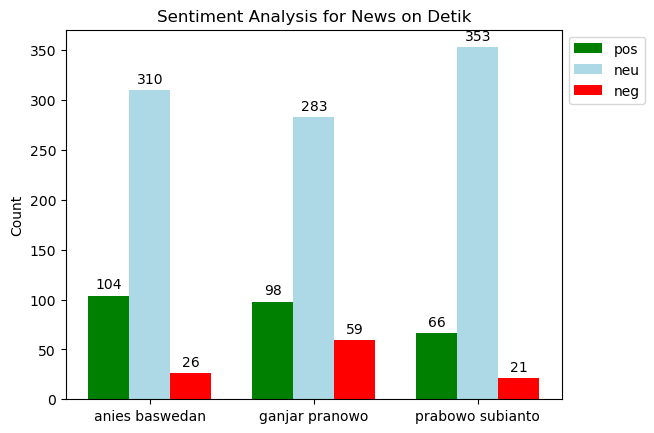

In [84]:
data_visualization(df_all_detik, 'Detik')

In [51]:
df_all_kompas = pd.concat([df_anies_kompas, df_prabowo_kompas, df_ganjar_kompas]).reset_index(drop=True)

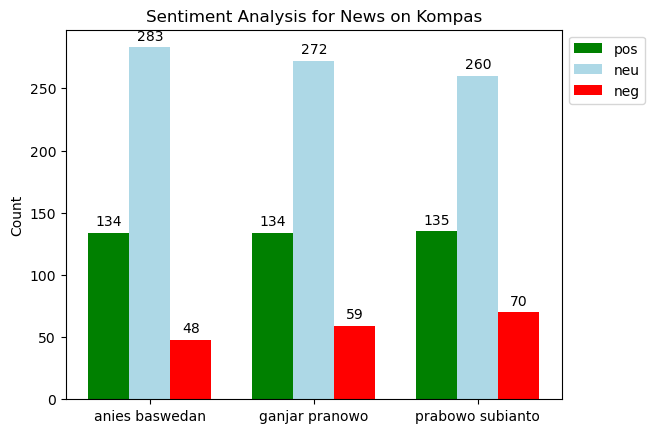

In [85]:
data_visualization(df_all_kompas, 'Kompas')

In [53]:
df_all_liputan = pd.concat([df_anies_liputan, df_prabowo_liputan, df_ganjar_liputan]).reset_index(drop=True)

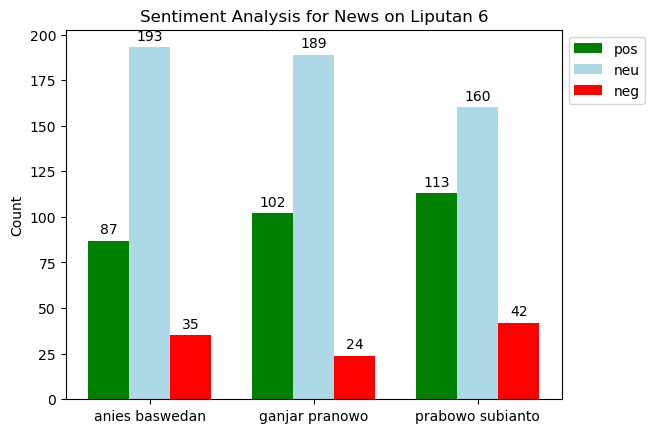

In [86]:
data_visualization(df_all_liputan, 'Liputan 6')

In [55]:
df_all_3sources = pd.concat([df_all_detik, df_all_kompas, df_all_liputan]).reset_index(drop=True)

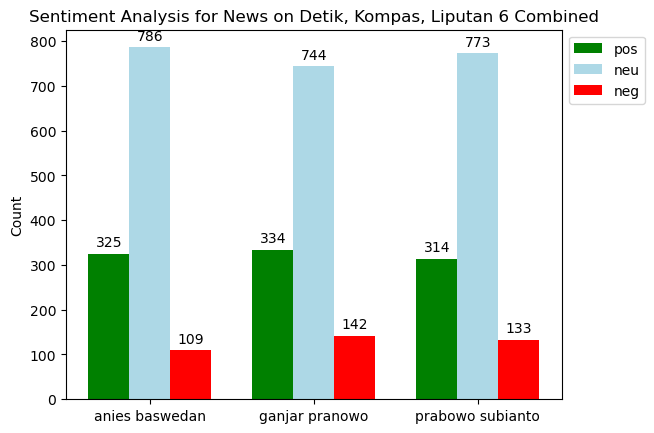

In [87]:
data_visualization(df_all_3sources, 'Detik, Kompas, Liputan 6 Combined')

In [57]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [58]:
stopwords = ['di', 'ke', 'untuk', 'dari', 'dan', 'ini', 'itu', 'juga', 'saat']

In [76]:
def wc(df, img_path):
  text = ' '.join([i for i in df.title])
  print(f'There are {len(text)} words from news title with keyword {df["keyword"].unique()}')

  mask = np.array(Image.open(img_path))
  wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=5000, mask=mask).generate(text)

  image_colors=ImageColorGenerator(mask)
  plt.figure(figsize=(7,7))
  plt.imshow(wordcloud_por.recolor(color_func=image_colors))
  plt.axis('off')
  plt.show()

In [77]:
df_all_3sources

,keyword,platform,url,title,score
0,anies baswedan,detik.com,https://www.detik.com/bali/berita/d-7149875/an...,"Anies Selfie di Monumen Welcome to Batam, Dulu...",0.800000
1,anies baswedan,detik.com,https://www.detik.com/sumut/berita/d-7149801/r...,"Ratusan Baliho Anies Dirusak di Medan, Pelaku ...",0.000000
2,anies baswedan,detik.com,https://news.detik.com/pemilu/d-7149890/timnas...,Timnas Ungkap Anies Tertarik Bangun Kereta Api...,0.250000
3,anies baswedan,detik.com,https://www.detik.com/sumut/berita/d-7149796/k...,"Kampanye di Batam, Anies Sebut Bakal Tingkatka...",0.033333
4,anies baswedan,detik.com,https://news.detik.com/detiktv/d-7149846/gaya-...,Gaya Anies Selfie di Monumen 'Welcome to Batam',0.800000
...,...,...,...,...,...
3655,ganjar pranowo,liputan6.com,https://www.liputan6.com/pemilu/read/5501571/r...,Relawan Sosialisasikan Program Ganjar-Mahfud s...,0.200000
3656,ganjar pranowo,liputan6.com,https://www.liputan6.com/pemilu/read/5500751/s...,"Sapa Srikandi PDIP di Lampung, Siti Atikoh Gan...",0.000000
3657,ganjar pranowo,liputan6.com,https://www.liputan6.com/pemilu/read/5500684/g...,Ganjar Hadiri Haul ke-65 Kyai Barawi Hanafi di...,0.000000
3658,ganjar pranowo,liputan6.com,https://www.liputan6.com/pemilu/read/5501422/p...,"Puas dengan Penampilan Debat, Relawan dan Jema...",0.500000


There are 85271 words from news title with keyword ['anies baswedan']


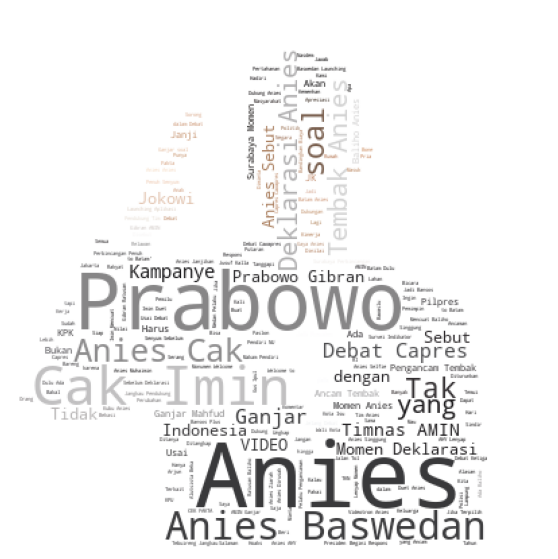

In [80]:
wc(df_all_3sources[df_all_3sources['keyword'] == 'anies baswedan'], './mask_images/anies-PhotoRoom.png-PhotoRoom.png')

There are 86415 words from news title with keyword ['prabowo subianto']


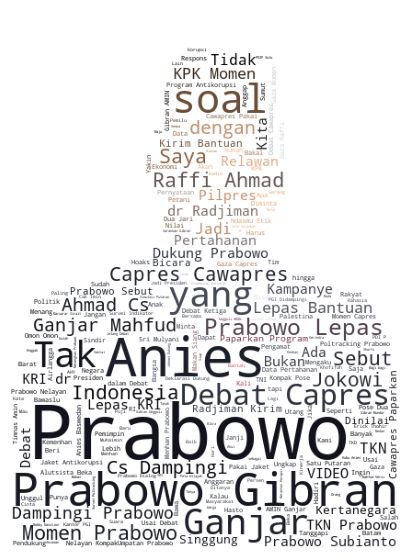

In [79]:
wc(df_all_3sources[df_all_3sources['keyword'] == 'prabowo subianto'], './mask_images/prabowo-PhotoRoom.png-PhotoRoom.png')

There are 84959 words from news title with keyword ['ganjar pranowo']


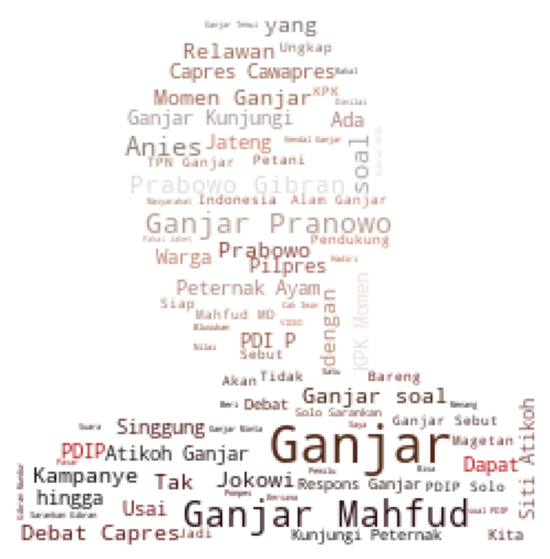

In [81]:
wc(df_all_3sources[df_all_3sources['keyword'] == 'ganjar pranowo'], './mask_images/ganjar-pranowo-PhotoRoom.png-PhotoRoom.png')